In [32]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import winsorize



* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`


In [34]:
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [35]:
#Look at df stats
df.describe()

#Look at data types per column
types = df.dtypes
types

#Class imbalance
df['price'].value_counts()

150.0    955
100.0    844
60.0     650
50.0     627
75.0     623
        ... 
287.0      1
815.0      1
609.0      1
468.0      1
985.0      1
Name: price, Length: 684, dtype: int64

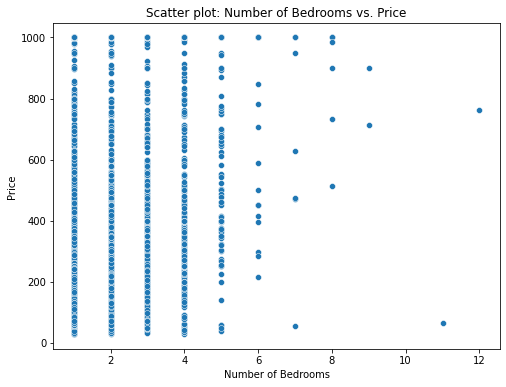

In [36]:
#Visualize number_of_bedrooms and price relationship via scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title("Scatter plot: Number of Bedrooms vs. Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.show()

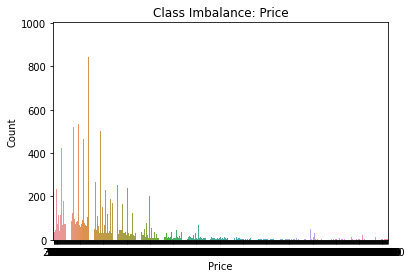

In [26]:
#Visualize class imbalance using seaborn countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='price')
plt.title("Class Imbalance: Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [37]:
#We can handle the missing values. 
#I will convert all data variables to numerical values for flowing data 
df.fillna(df.mean(), inplace=True) 
#Above code replaces those values with mean to reduce bias.

In [58]:
#Then we one-hot encode for catgeroical features
#Had to rename resulting columns to keep same index
#Then updated that inthe df
df_encoded = pd.get_dummies(df, columns=['host_location'])
encoded_columns = df_encoded.columns
column_to_keep = 'host_location'
new_column_names = [column_to_keep if col.startswith(column_to_keep) else col for col in encoded_columns]
df_encoded.columns = new_column_names

In [39]:
#Winsorize df to handle outliers
winsorized_prices = winsorize(df['price'], limits=[0.05, 0.05])
df['price'] = winsorized_prices

#Since no feature renaming is necessary and there are no NLP features, we can move forward.

In [59]:
#The features I will choose are location, number of bedrooms, number of bathrooms, availability, and accommodation type.
#Selecting features and target
selected_features = ['host_location', 'bedrooms', 'bathrooms', 'host_is_superhost', 'reviews_per_month']
X = df_encoded[selected_features]
y = df['price']

In [61]:
#Splitting data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#I will now be implementing all of the models at once for better visualization purposes.

#Initializing all models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
gradient_boosting_reg = GradientBoostingRegressor()

#Training all models
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
#Evaluating all models
y_pred_linear = linear_reg.predict(X_test)
y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_random_forest = random_forest_reg.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_reg.predict(X_test)

In [64]:
#I chose the RMSE as an appropriate metric for my model. It is a perfect metric that is appropriate for a regression model.
#It measures by taking the square root of the average squared difference between actual and predicted values. 
#The lower the RSME, the better it is for the model’s performance. 
#This metric will help measure the accuracy of the regression model.
#I will now caluclate the RMSE for each model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred_decision_tree))
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_pred_random_forest))
rmse_gradient_boosting = np.sqrt(mean_squared_error(y_test, y_pred_gradient_boosting))

In [65]:
#I can now compare the performance of the different models. 
#The model that has the lowest RMSE would be chosen. 
#The final model will finally be trained and applied to make predictions on new data. 
best_model = min(rmse_linear, rmse_decision_tree, rmse_random_forest, rmse_gradient_boosting)

print("Root Mean Squared Error (RMSE) for Linear Regression:", rmse_linear)
print("Root Mean Squared Error (RMSE) for Decision Tree:", rmse_decision_tree)
print("Root Mean Squared Error (RMSE) for Random Forest:", rmse_random_forest)
print("Root Mean Squared Error (RMSE) for Gradient Boosting:", rmse_gradient_boosting)

print("Best Model (lowest RMSE):", best_model)

Root Mean Squared Error (RMSE) for Linear Regression: 5744269107582.645
Root Mean Squared Error (RMSE) for Decision Tree: 95.50094603509025
Root Mean Squared Error (RMSE) for Random Forest: 87.44426507093115
Root Mean Squared Error (RMSE) for Gradient Boosting: 80.44849852817276
Best Model (lowest RMSE): 80.44849852817276


As we can see from the printed results of the RSME for the models, the best model is Gradient Bossting with the lowest RMSE of 80.4485. The RMSE value for the linear regression model is extremely high suggesting that this model is not performing well on the data.  The RMSE value for the decision tree model is relatively lower than the linear regression model, but still relatively high. The RMSE value for the random forest model is lower than both linear regression and decision tree models, indicating a better performance. The gradient boosting model shows the lowest RMSE value among all the models which suggests that gradient boosting has performed the best. 